## Introduction ## 

This project explores a statistic known as BABIP, or batting average on balls in play, in combination with batted ball statistics.

Examples of batted ball statistics are ground ball percentage, line drive percentage, and hard hit percentage. Because an increase in batting average on balls in play can be due to shear luck (A high rate of hits that find holes in the infield, or blooper's into the outfield etc.), it is my belief that the change in a player's batted ball statistics, relative to their BABIP can help distinguish between an increase in luck, and an increase in skill.

This project will be using trends between the 2016 and 2017 seasons, to find the change in a player's batted ball statistics, through Python's pandas library. This change will be denoted by the symbol "∆". It will then use seaborne to visualize whether or not these statistics can predict player regression. 

A new addition to this project is a web-scraper, which is based off PyBaseball's batted ball statistics scraper. PyBaseball's scraper is broken as of August 2019.




### Scrape Data from Web

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import requests

In [3]:
## NOTE : This webscraper is based off of the batting statistics web scraper from PyBaseball. 
## The webscraper in PyBaseball broke, so I made some changes to it to restore it's functionality.

def getBaseball(year):    
    
    url = 'https://fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=1&type=c,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,-1&season={}&month=0&season1=&ind=1&team=&rost=&age=&filter=&players=&page=1_100000'
    url = url.format(year)
    s=requests.get(url)
    soup = BeautifulSoup(s.content, 'html.parser')

    baseballstats = soup.find_all('table', class_ = "rgMasterTable")
    baseballstats = baseballstats[0]

    
    headings = [row.text.strip() for row in baseballstats.find_all('th')[1:]]
    FBperc_indices = [i for i,j in enumerate(headings) if j=='FB%']
    headings[FBperc_indices[1]]='FB% (Pitch)'

    table_body = baseballstats.find('tbody')
    table_rows = table_body.find_all('tr')
    
    
    
    data = []
    for row in table_rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols[1:]])


    for i in range(len(data)):
        for j in range(len(data[i])):
            if '%' in data[i][j]:
                data[i][j] = data[i][j].strip(' %')
                data[i][j] = data[i][j].strip('%')

    DF = pd.DataFrame(data=data, columns=headings)
    DF.replace(r'^\s*$', np.nan, regex=True, inplace = True)

    cols_to_numeric = [col for col in DF.columns if col not in ['Name', 'Team', 'Age Rng', 'Dol']]
    DF[cols_to_numeric] = DF[cols_to_numeric].astype(float)

    DF = DF.sort_values(['WAR'], ascending=False)

    return DF

In [4]:
data_2018 = getBaseball(2018)
data_2017 = getBaseball(2017)
data_2016 = getBaseball(2016)

#### Editing DataFrame

We will first clean the DataFrames to retain the statistics that we need. Then, we will merge the 2016 and 2017 dataframes in order to create the ∆ statistics.

In [5]:
data_2017.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
37,2017.0,Aaron Judge,Yankees,25.0,155.0,542.0,678.0,154.0,75.0,24.0,...,-0.71,NaN,26.0,63.2,41.1,41.7,82.9,67.4,40.7,24.4
48,2017.0,Jose Altuve,Astros,27.0,153.0,590.0,662.0,204.0,137.0,39.0,...,1.17,NaN,33.2,64.2,47.7,72.8,92.2,85.0,46.8,25.6
46,2017.0,Giancarlo Stanton,Marlins,27.0,159.0,597.0,692.0,168.0,77.0,32.0,...,-0.07,NaN,27.9,63.8,42.9,48.2,84.2,70.5,41.6,22.5
35,2017.0,Mike Trout,Angels,25.0,114.0,402.0,507.0,123.0,62.0,25.0,...,1.94,NaN,20.9,58.0,37.8,71.6,88.0,83.1,45.7,23.8
51,2017.0,Kris Bryant,Cubs,25.0,151.0,549.0,665.0,162.0,91.0,38.0,...,0.95,NaN,27.2,68.8,45.4,59.4,86.6,77.4,43.7,25.2


In [ ]:
#Collecting the wRC+ of players in 2018. 

data_2018_wrc = data_2018[['wRC+', 'AB', 'Name']]
data_2018_wrc.rename({'wRC+' : 'wRC+2018'}, axis=1, inplace = True)
data_2018_wrc.set_index('Name', inplace = True)
data_2018_wrc = data_2018_wrc[data_2018_wrc['AB'] > 150]

In [7]:
#Editing 2017 player data so that we only retain the data that is needed

data_2017_babip = data_2017[['BABIP', 'wRC+', 'Hard%', 'Age', 'LD%', 'Soft%', 'GB%', 'FB%', 'Name', 'AB']]
data_2017_babip.set_index('Name', inplace = True)
data_2017_babip.rename({'LD%':'LD%2017', 'BABIP' : 'BABIP2017', 'wRC+' : 'wRC+2017', 'Hard%' : 'Hard%2017', 'Soft%':'Soft%2017', 'GB%' : 'GB%2017', 'FB%' : 'FB%2017'}, axis=1, inplace = True)
data_2017_babip.head()

,BABIP2017,wRC+2017,Hard%2017,Age,LD%2017,Soft%2017,GB%2017,FB%2017,AB
Name,,,,,,,,,
Aaron Judge,0.357,174.0,45.3,25.0,21.9,11.2,34.9,43.2,542.0
Jose Altuve,0.370,160.0,28.2,27.0,20.3,19.0,47.0,32.7,590.0
Giancarlo Stanton,0.288,158.0,38.9,27.0,16.0,20.8,44.6,39.4,597.0
Mike Trout,0.318,180.0,38.3,25.0,18.4,19.0,36.7,44.9,402.0
Kris Bryant,0.334,146.0,32.8,25.0,19.9,14.8,37.7,42.4,549.0


In [8]:
#Editing 2016 player data so that we only retain the data that is needed

data_2016_babip = data_2016[['BABIP', 'wRC+', 'Hard%', 'LD%', 'Soft%', 'GB%', 'FB%', 'Name', 'AB']]
data_2016_babip.set_index('Name', inplace = True)
data_2016_babip.head()

,BABIP,wRC+,Hard%,LD%,Soft%,GB%,FB%,AB
Name,,,,,,,,
Mike Trout,0.371,170.0,41.7,22.1,12.0,41.2,36.7,549.0
Mookie Betts,0.322,136.0,33.4,19.3,17.4,41.4,39.4,672.0
Kris Bryant,0.332,148.0,40.3,23.7,17.0,30.5,45.8,603.0
Josh Donaldson,0.300,157.0,40.4,21.3,16.4,38.2,40.6,577.0
Corey Seager,0.355,136.0,39.7,24.4,12.7,46.3,29.3,627.0


In [9]:
#Merging 2017 and 2016 data in order to create ∆ Stats

data_babip = pd.merge(data_2017_babip, data_2016_babip, on = 'Name')
data_babip = data_babip[data_babip['AB_x'] > 150]
data_babip = data_babip[data_babip['AB_y'] > 150]
data_babip.drop('AB_x', axis=1, inplace = True)
data_babip.drop('AB_y', axis=1, inplace = True)
data_babip = pd.merge(data_babip, data_2018_wrc, on = 'Name')
data_babip.head()

,BABIP2017,wRC+2017,Hard%2017,Age,LD%2017,Soft%2017,GB%2017,FB%2017,BABIP,wRC+,Hard%,LD%,Soft%,GB%,FB%,wRC+2018,AB
Name,,,,,,,,,,,,,,,,,
Jose Altuve,0.370,160.0,28.2,27.0,20.3,19.0,47.0,32.7,0.347,152.0,33.8,26.2,13.6,41.6,32.2,134.0,534.0
Giancarlo Stanton,0.288,158.0,38.9,27.0,16.0,20.8,44.6,39.4,0.290,118.0,42.9,16.7,17.1,40.0,43.3,129.0,617.0
Mike Trout,0.318,180.0,38.3,25.0,18.4,19.0,36.7,44.9,0.371,170.0,41.7,22.1,12.0,41.2,36.7,190.0,471.0
Kris Bryant,0.334,146.0,32.8,25.0,19.9,14.8,37.7,42.4,0.332,148.0,40.3,23.7,17.0,30.5,45.8,125.0,389.0
Anthony Rendon,0.314,141.0,34.3,27.0,18.8,13.0,34.0,47.2,0.304,110.0,36.5,20.6,13.8,35.7,43.8,139.0,529.0


#### Making ∆ Stats ###

In order to visualize whether or not a player's change in batted ball statistics, relative to their change in BABIP, has any indication on their likelihood of regression, we will need to generate this statistic for each of the relavent statistics.

In [10]:
ChangeStats = ['wRC+', 'Hard%', 'LD%', 'Soft%', 'GB%', 'FB%', 'BABIP']
for stat in ChangeStats:
    data_babip['d' + stat] = data_babip[stat + '2017'] - data_babip[stat]

In [11]:
#Cleaning DataSet of unneeded Stats
for stat in ChangeStats:
    data_babip.drop(stat, axis = 1, inplace = True)

In [39]:
#Making a categorical statistic for change in performance
data_babip['Progress'] = data_babip['wRC+2018'] - data_babip['wRC+2017']
data_babip['Regress'] = np.where(data_babip['Progress'] <= -15, 'Yes', 'No')
data_babip['Improved2017FlukeSoft'] = np.where((data_babip['dwRC+'] >= 0) & (data_babip['dSoft%'] > 0),'Yes', 'No')
data_babip['Improved2017FlukeFB'] = np.where((data_babip['dwRC+'] >= 0) & (data_babip['dFB%'] < 0),'Yes', 'No')
data_babip['Improved2017FlukeGB'] = np.where((data_babip['dwRC+'] >= 0) & (data_babip['dGB%'] > 0),'Yes', 'No')
data_babip['Improved2017FlukeLD'] = np.where((data_babip['dwRC+'] >= 0) & (data_babip['dLD%'] < 0),'Yes', 'No')

In [26]:
data_babip.head()

,BABIP2017,wRC+2017,Hard%2017,Age,LD%2017,Soft%2017,GB%2017,FB%2017,wRC+2018,AB,...,dHard%,dLD%,dSoft%,dGB%,dFB%,dBABIP,Progress,Regress,Improved2017Fluke1,Improved2017Fluke2
Name,,,,,,,,,,,,,,,,,,,,,
Jose Altuve,0.370,160.0,28.2,27.0,20.3,19.0,47.0,32.7,134.0,534.0,...,-5.6,-5.9,5.4,5.4,0.5,0.023,-26.0,Yes,Yes,Yes
Giancarlo Stanton,0.288,158.0,38.9,27.0,16.0,20.8,44.6,39.4,129.0,617.0,...,-4.0,-0.7,3.7,4.6,-3.9,-0.002,-29.0,Yes,No,Yes
Mike Trout,0.318,180.0,38.3,25.0,18.4,19.0,36.7,44.9,190.0,471.0,...,-3.4,-3.7,7.0,-4.5,8.2,-0.053,10.0,No,No,Yes
Kris Bryant,0.334,146.0,32.8,25.0,19.9,14.8,37.7,42.4,125.0,389.0,...,-7.5,-3.8,-2.2,7.2,-3.4,0.002,-21.0,Yes,No,No
Anthony Rendon,0.314,141.0,34.3,27.0,18.8,13.0,34.0,47.2,139.0,529.0,...,-2.2,-1.8,-0.8,-1.7,3.4,0.010,-2.0,No,No,Yes


## Data Anlaysis & Visualization##

Using seaborn library to perform different visualizations.

In [14]:
import seaborn as sns

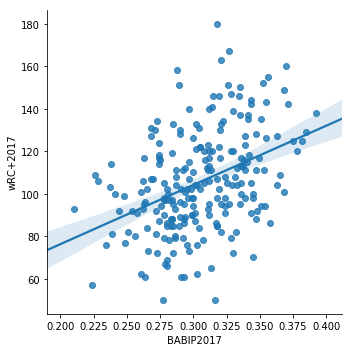

In [15]:
#Relationship between performance and BABIP. Increased BABIP usually means increased performance

sns.lmplot(x = 'BABIP2017', y = 'wRC+2017', data= data_babip)

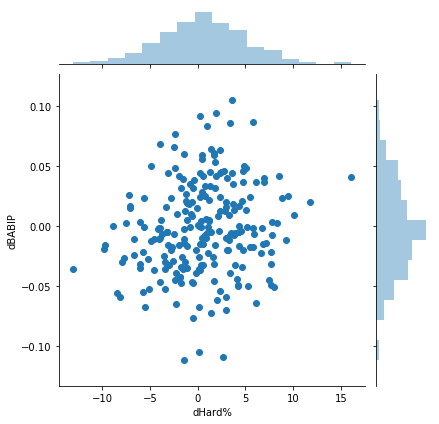

In [16]:
#As Hard Hit ball Percentage goes up, BABIP should also increase. However, there is a lot of noise in the data, indicating an element of luck.

sns.jointplot(x = 'dHard%', y = 'dBABIP', data= data_babip)

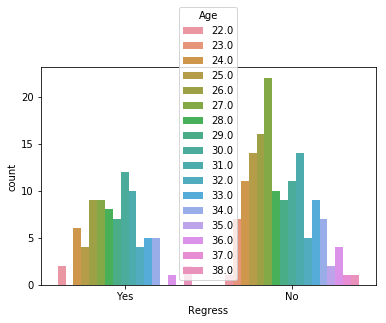

In [17]:
#Age is often a predictor of regression. If these statistics were to be used in a model, it may be worthwhile
# to take age in to considerationr players are more highly represented in the 'Regressed' category, while younger 
# players are more highly represented in the 'Did not regress category'.

sns.countplot(x = 'Regress', data= data_babip, hue = 'Age' )

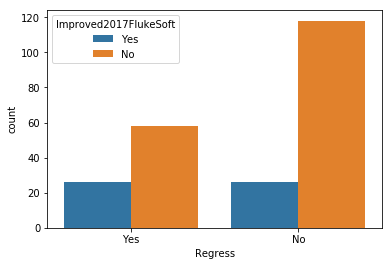

In [46]:
#Out of the players who regressed from 2017 to 2018, almost a third of them had "fluke" increases in BABIP
# from 2016 to 2017. While, this was closer to 1/7 for those who did not regress. This shows that trends in battled ball 
#statistics may some power in predicting player regression.

sns.countplot(x = 'Regress', data=data_babip, hue = 'Improved2017FlukeSoft')

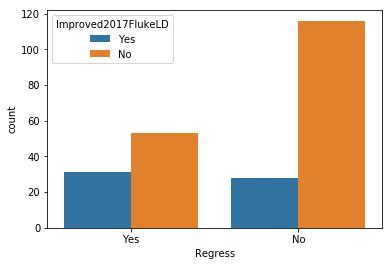

In [48]:
#The above relationship is even stronger with Line driver percentage.

sns.countplot(x = 'Regress', data=data_babip, hue = 'Improved2017FlukeLD')